In [240]:
import pandas as pd
df=pd.read_csv('monatszahlen2307_verkehrsunfaelle_10_07_23_nosum.csv',usecols=["MONATSZAHL","AUSPRAEGUNG","JAHR","MONAT","WERT"])

In [241]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN


In [242]:
df.rename(columns={'MONATSZAHL':'Category','AUSPRAEGUNG':'Type','JAHR':'Year','MONAT':'Month','WERT':'Value'},inplace=True)

In [244]:
df_20=df[df['Year']<=2020].reset_index(drop=True)

In [245]:
df_20.head()

,Category,Type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2020,202001,28.0
1,Alkoholunfälle,insgesamt,2020,202002,40.0
2,Alkoholunfälle,insgesamt,2020,202003,27.0
3,Alkoholunfälle,insgesamt,2020,202004,26.0
4,Alkoholunfälle,insgesamt,2020,202005,40.0


In [246]:
df_20['Month']=df_20['Month'].apply(lambda x:int(x%100))

In [247]:
df_20.head()

,Category,Type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2020,1,28.0
1,Alkoholunfälle,insgesamt,2020,2,40.0
2,Alkoholunfälle,insgesamt,2020,3,27.0
3,Alkoholunfälle,insgesamt,2020,4,26.0
4,Alkoholunfälle,insgesamt,2020,5,40.0


In [248]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  1764 non-null   object 
 1   Type      1764 non-null   object 
 2   Year      1764 non-null   int64  
 3   Month     1764 non-null   int64  
 4   Value     1764 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 69.0+ KB


In [249]:
df_20.isnull().sum()

Category    0
Type        0
Year        0
Month       0
Value       0
dtype: int64

In [250]:
df_20.describe()

,Year,Month,Value
count,1764.000000,1764.000000,1764.000000
mean,2010.000000,6.500000,780.292517
std,6.057018,3.453031,1180.838117
min,2000.000000,1.000000,0.000000
25%,2005.000000,3.750000,38.750000
50%,2010.000000,6.500000,360.000000
75%,2015.000000,9.250000,813.250000
max,2020.000000,12.000000,4763.000000


In [251]:
num_features=[cols for cols in df.columns if df[cols].dtype!='O']
cat_features=[cols for cols in df.columns if df[cols].dtype=='O']
print(f"numerical columns are:{num_features}")
print(f"categorical columns are:{cat_features}")

numerical columns are:['Year', 'Month', 'Value']
categorical columns are:['Category', 'Type']


In [252]:
df_20['Category'].value_counts()

Category
Verkehrsunfälle    756
Alkoholunfälle     504
Fluchtunfälle      504
Name: count, dtype: int64

In [253]:
df_20['Type'].value_counts()

Type
insgesamt                 756
Verletzte und Getötete    756
mit Personenschäden       252
Name: count, dtype: int64

In [256]:
df_20['Date']=pd.to_datetime(df_20[['Year','Month']].assign(day=1))

In [259]:
df_20['Week']=df_20['Date'].dt.day_of_week

In [260]:
df_20.head()

,Category,Type,Year,Month,Value,Date,Week
0,Alkoholunfälle,insgesamt,2020,1,28.0,2020-01-01,2
1,Alkoholunfälle,insgesamt,2020,2,40.0,2020-02-01,5
2,Alkoholunfälle,insgesamt,2020,3,27.0,2020-03-01,6
3,Alkoholunfälle,insgesamt,2020,4,26.0,2020-04-01,2
4,Alkoholunfälle,insgesamt,2020,5,40.0,2020-05-01,4


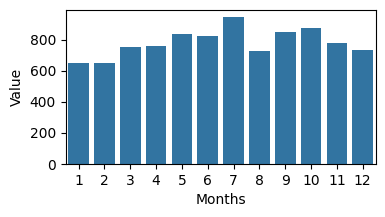

In [411]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,2))
months = range(1, 13)
monthly_mean = df_20.groupby('Month')['Value'].mean()
sns.barplot(x=months,y=monthly_mean)
plt.xlabel('Months')
plt.show()

#### Month of 'july' has the highest number of accidents while 'jan' and 'feb' has the least
#### Lets see this trend per year

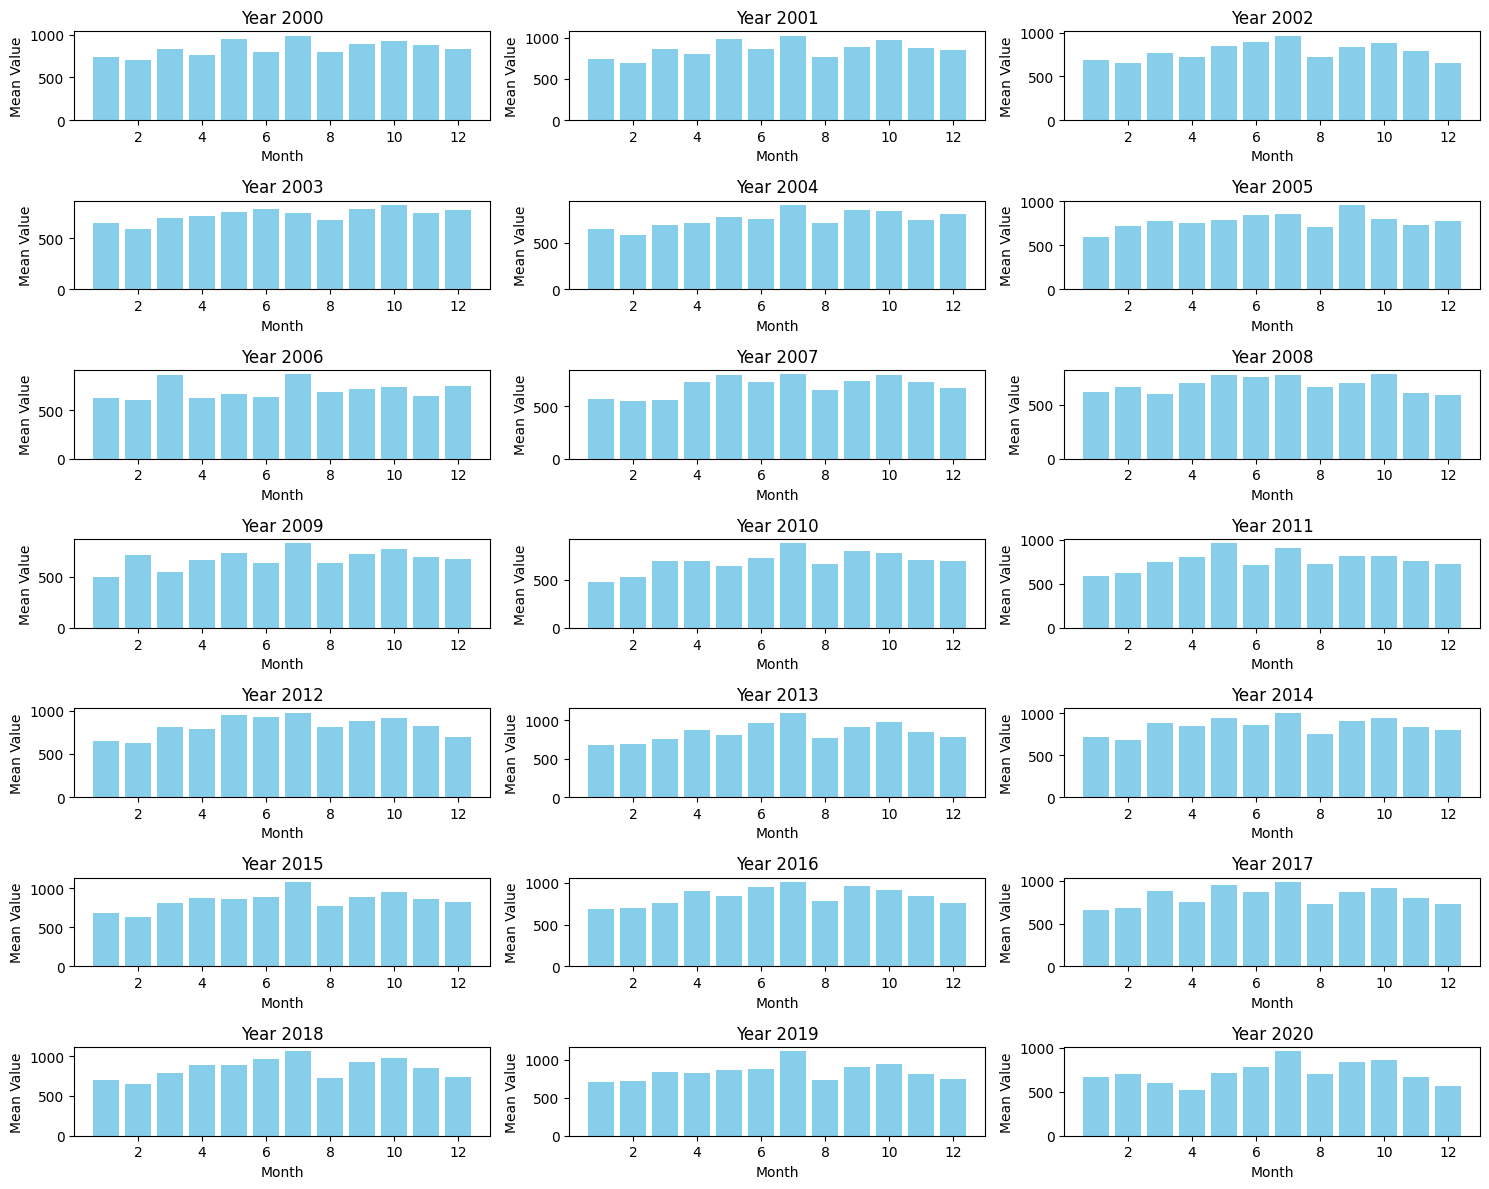

In [277]:
# Assuming df_20 is your DataFrame
fig, ax = plt.subplots(7, 3, figsize=(15, 12))  # Adjust figsize as needed
months = range(1, 13)

for i in range(7):
    for j, year in enumerate(range(2000 + i * 3, 2000 + (i + 1) * 3)):
        df_yearly = df_20[df_20['Year'] == year]
        monthly_mean = df_yearly.groupby('Month')['Value'].mean()
        ax[i, j].bar(months, monthly_mean, color='skyblue')
        ax[i, j].set_title(f'Year {year}')
        ax[i, j].set_xlabel('Month')
        ax[i, j].set_ylabel('Mean Value')

# Adjust layout
plt.tight_layout()
plt.show()

##### except for few exception the trend that we saw above is also visible in each year, means number of accidents are affected by month

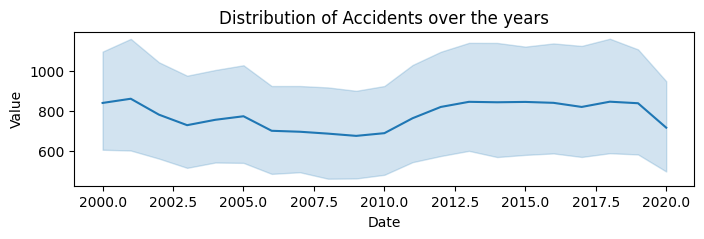

In [412]:
# Visualize the distribution of accidents over the years
plt.figure(figsize=(8, 2))
sns.lineplot(x=df_20['Date'].dt.year, y=df_20['Value'])
plt.title('Distribution of Accidents over the years')
plt.show()

##### The number of accident decreased from 2000 to 2011 and after that it again starting increasing reaching all time high in 2015, and finlly it drops in 2020

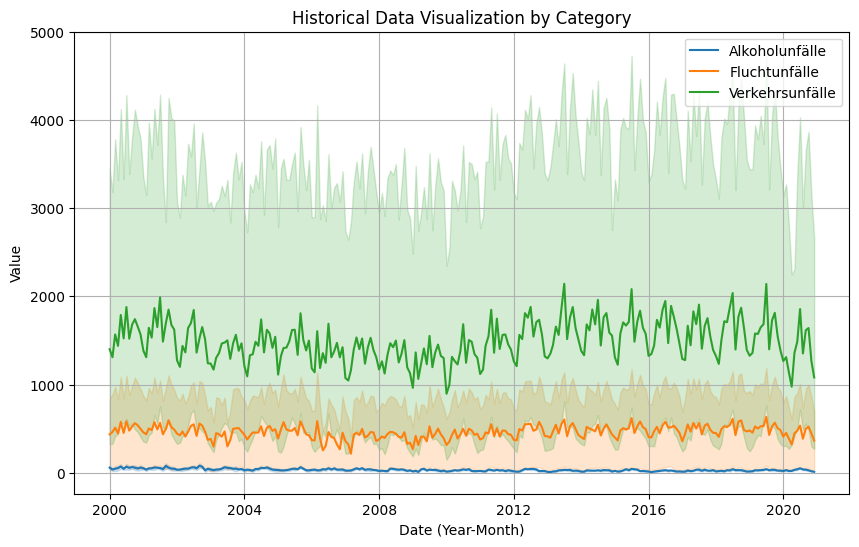

In [278]:

plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Value', data=df_20,hue='Category')
plt.title('Historical Data Visualization by Category')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

##### The trend we saw above is visible most in Category 'Verkehrsunfälle' and to some extent in also visible in 'Fluchtunfälle'

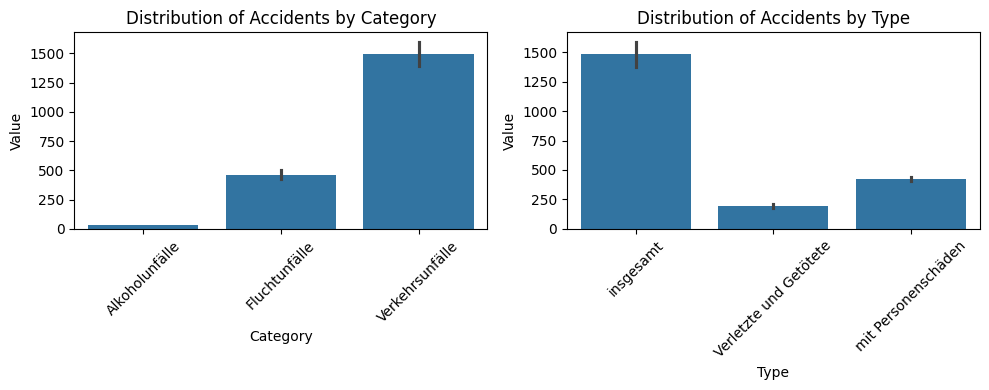

In [403]:

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Visualize the distribution of accidents by category
sns.barplot(x='Category', y='Value',data=df_20, ax=axes[0])
axes[0].set_title('Distribution of Accidents by Category')
axes[0].tick_params(axis='x', rotation=45)

# Visualize the distribution of accidents by type
sns.barplot(x='Type', y='Value', data=df_20, ax=axes[1])
axes[1].set_title('Distribution of Accidents by Type')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

##### Category 'Verkehrsunfälle' has the highest number of accidents
##### Type 'insgeamt' which is total of all subcategories has the highest number of accidents
##### now let see distribution by boxplots

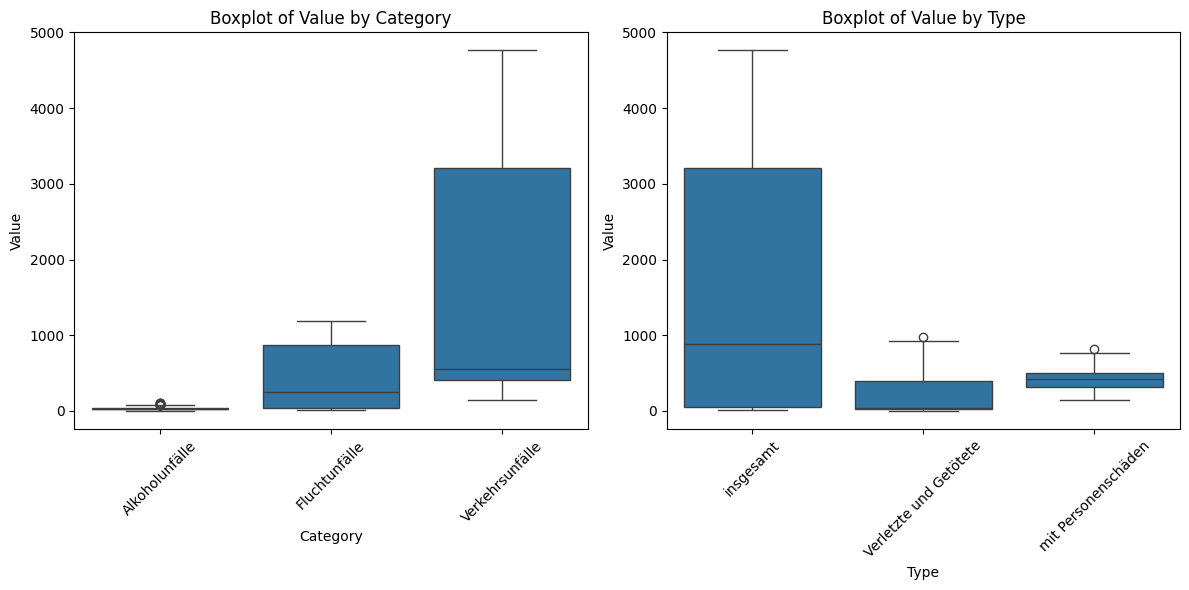

In [280]:
import seaborn as sns
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for 'Value' by Category
sns.boxplot(x='Category', y='Value', data=df_20, ax=axes[0])
axes[0].set_title('Boxplot of Value by Category')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot for 'Value' by Type
sns.boxplot(x='Type', y='Value', data=df_20, ax=axes[1])
axes[1].set_title('Boxplot of Value by Type')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


##### Boxplots shows means of the different Catgories also separable and also for different types of accidents, thus confirming the Catgeory and Type of accident will play an important role in prediction of Value

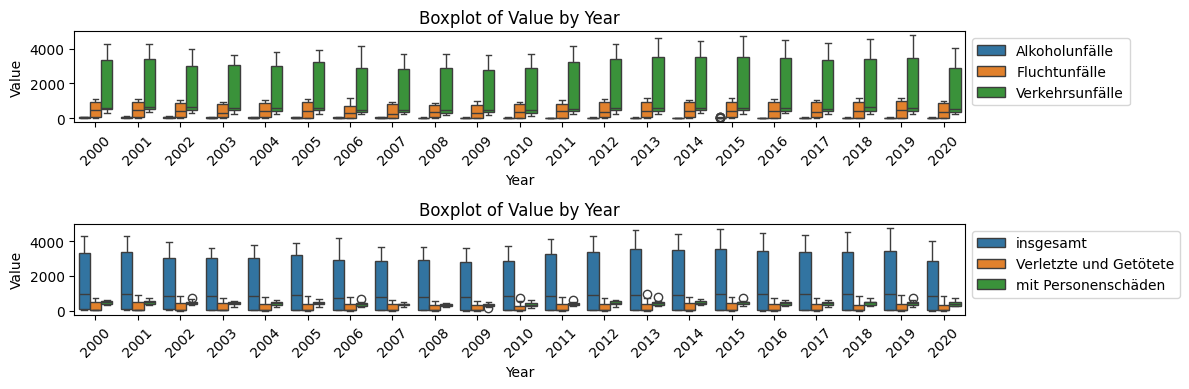

In [401]:
import seaborn as sns
# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 4))

# Boxplot for 'Value' by Category
sns.boxplot(x='Year',y='Value',data=df_20,hue='Category',ax=axes[0])
axes[0].set_title('Boxplot of Value by Year')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(loc='upper left',bbox_to_anchor=(1,1))

# Boxplot for 'Value' by Type
sns.boxplot(x='Year',y='Value',data=df_20,hue='Type',ax=axes[1])
axes[1].set_title('Boxplot of Value by Year')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(loc='upper left',bbox_to_anchor=(1,1))

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

##### The trend we saw above is also prevalent every year as we can see here for both Category and Type of accident
##### Also as we saw in yearly line plot  number of accidents has increased after 2012 to 2019  in per Category and Type

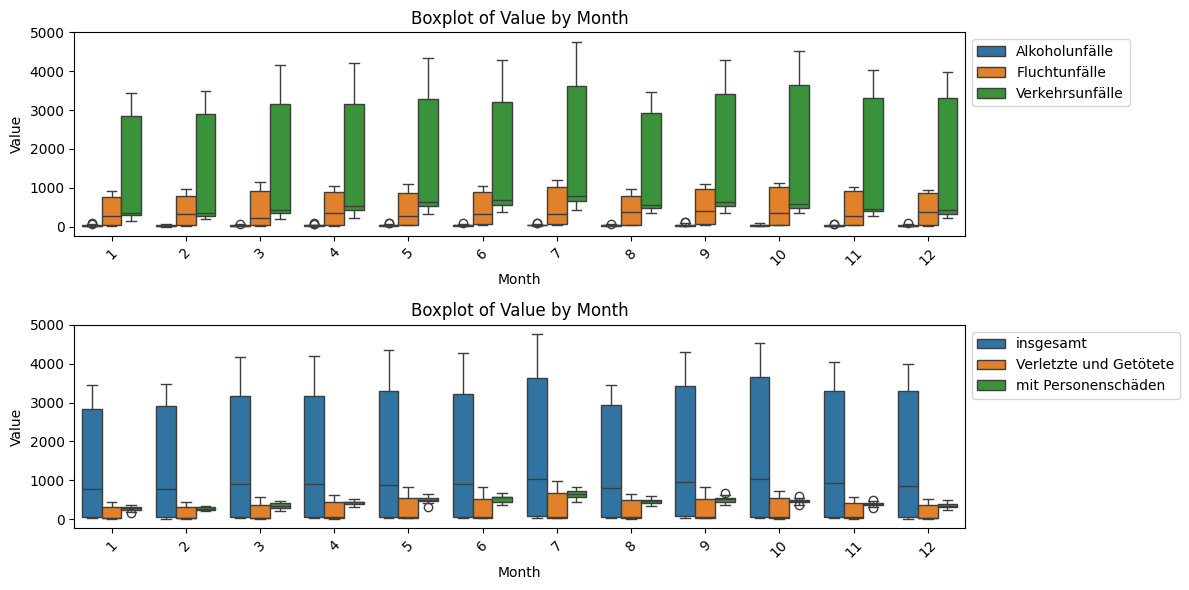

In [400]:
import seaborn as sns
# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Boxplot for 'Value' by Category
sns.boxplot(x='Month',y='Value',data=df_20,hue='Category',ax=axes[0])
axes[0].set_title('Boxplot of Value by Month')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Boxplot for 'Value' by Type
sns.boxplot(x='Month',y='Value',data=df_20,hue='Type',ax=axes[1])
axes[1].set_title('Boxplot of Value by Month')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

##### The trend we saw above is also prevalent every month as we can see here for both Category and Type of accident
##### Also here month of 'July' which is 7 has the highest number of accidents for Category and Type of accidents

In [261]:
df_20['Quarter']=df_20['Date'].dt.quarter
reference_date = pd.to_datetime('1999-12-31') #take the date a day before dataset was registered
df_20['DaysSinceReference'] = (df_20['Date'] - reference_date).dt.days

In [262]:
num_features=num_features+['Quarter','DaysSinceReference','Week']
df_20[num_features].corr('spearman')

,Year,Month,Value,Quarter,DaysSinceReference,Week
Year,1.000000,0.000000,-0.052969,0.000000,0.998873,0.008693
Month,0.000000,1.000000,0.069510,0.971625,0.047454,0.002299
Value,-0.052969,0.069510,1.000000,0.072990,-0.049610,0.001072
Quarter,0.000000,0.971625,0.072990,1.000000,0.046107,-0.005226
DaysSinceReference,0.998873,0.047454,-0.049610,0.046107,1.000000,0.008792
Week,0.008693,0.002299,0.001072,-0.005226,0.008792,1.000000


In [283]:
df_20['Quarter']=df_20['Quarter'].map({1:'Q1',2:'Q2',3:'Q3',4:'Q4'}) #convert Quarters to categorical column

<Axes: xlabel='Quarter', ylabel='Value'>

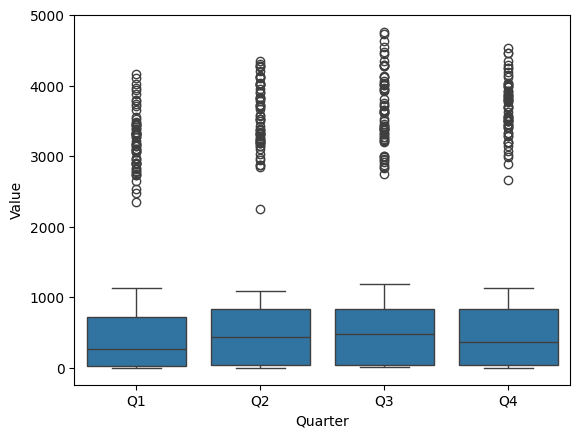

In [32]:
sns.boxplot(x='Quarter',y='Value',data=df_20)

##### as expected there is not much difference in number of accidents between quarters of years, so we will not take this column in feature set.

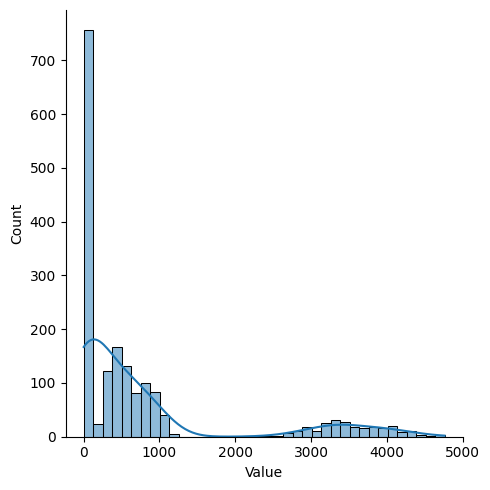

In [392]:
sns.displot(x='Value',data=df_20,kde=True)

In [312]:
df_final=df_20[['Category','Type','Year','Month','Value']]
df_final

,Category,Type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2020,1,28.0
1,Alkoholunfälle,insgesamt,2020,2,40.0
2,Alkoholunfälle,insgesamt,2020,3,27.0
3,Alkoholunfälle,insgesamt,2020,4,26.0
4,Alkoholunfälle,insgesamt,2020,5,40.0
...,...,...,...,...,...
1759,Verkehrsunfälle,Verletzte und Getötete,2000,8,647.0
1760,Verkehrsunfälle,Verletzte und Getötete,2000,9,675.0
1761,Verkehrsunfälle,Verletzte und Getötete,2000,10,615.0
1762,Verkehrsunfälle,Verletzte und Getötete,2000,11,578.0


In [314]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
oh_transformer = OneHotEncoder()
numeric_transformer = StandardScaler()
cat_col=['Category', 'Type']
num_col=['Year','Month']
preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", oh_transformer, cat_col),
         ("StandardScaler", numeric_transformer, num_col),        
    ]
)

In [315]:
X=df_final.drop('Value',axis=1)
y=df_final['Value']

In [316]:
X=preprocessor.fit_transform(X)

In [318]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [367]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False,loss_function='Poisson'),
    "AdaBoost Regressor": AdaBoostRegressor()
}


In [368]:
from sklearn.model_selection import cross_validate, KFold
import numpy as np

model_list = []
r2_list =[]
n_folds = 5 #will take 5 fold for cross validation
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

for model_name, model in models.items():
    # Use cross_validate for cross-validation
    cv_results = cross_validate(model, X, y, cv=kf, scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2'], return_train_score=True)
    n_train = len(y)  # Number of samples in training set
    k_train = X.shape[1]  # Number of predictors in training set
    
    n_test = len(y)  # Number of samples in testing set
    k_test = X.shape[1]  # Number of predictors in testing set
    
    print(model_name)
    
    # Calculate and display average metrics across folds
    avg_train_mae = np.abs(cv_results['train_neg_mean_absolute_error'].mean())
    avg_test_mae = np.abs(cv_results['test_neg_mean_absolute_error'].mean())
    
    avg_train_rmse = -cv_results['train_neg_root_mean_squared_error'].mean()
    avg_test_rmse = -cv_results['test_neg_root_mean_squared_error'].mean()
    
    avg_train_r2 = cv_results['train_r2'].mean()
    avg_test_r2 = cv_results['test_r2'].mean()
    
    avg_train_r2 = cv_results['train_r2'].mean()
    avg_adj_train_r2 = 1 - ((1 - avg_train_r2) * (n_train - 1) / (n_train - k_train - 1))
    
    avg_test_r2 = cv_results['test_r2'].mean()
    avg_adj_test_r2 = 1 - ((1 - avg_test_r2) * (n_test - 1) / (n_test - k_test - 1))
    model_list.append(model_name)
    
    print(f"Average Train MAE: {avg_train_mae:.4f}, Average Test MAE: {avg_test_mae:.4f}")
    print(f"Average Train RMSE: {avg_train_rmse:.4f}, Average Test RMSE: {avg_test_rmse:.4f}")
    print(f"Average Train R2: {avg_train_r2:.4f}, Average Test R2: {avg_test_r2:.4f}")
    print(f"Average Train Adjusted R2: {avg_adj_train_r2:.4f}, Average Adjusted Test R2: {avg_adj_test_r2:.4f}")
    print('=' * 35)
    
    r2_list.append(avg_adj_test_r2)


Linear Regression
Average Train MAE: 514.5625, Average Test MAE: 516.8793
Average Train RMSE: 619.8913, Average Test RMSE: 622.4512
Average Train R2: 0.7242, Average Test R2: 0.7202
Average Train Adjusted R2: 0.7229, Average Adjusted Test R2: 0.7190
Lasso
Average Train MAE: 509.1545, Average Test MAE: 511.8144
Average Train RMSE: 619.2024, Average Test RMSE: 621.9095
Average Train R2: 0.7248, Average Test R2: 0.7207
Average Train Adjusted R2: 0.7235, Average Adjusted Test R2: 0.7194
Ridge
Average Train MAE: 509.1770, Average Test MAE: 511.8285
Average Train RMSE: 619.1923, Average Test RMSE: 621.8925
Average Train R2: 0.7248, Average Test R2: 0.7207
Average Train Adjusted R2: 0.7235, Average Adjusted Test R2: 0.7195
K-Neighbors Regressor
Average Train MAE: 52.5781, Average Test MAE: 65.6053
Average Train RMSE: 108.2816, Average Test RMSE: 135.2091
Average Train R2: 0.9916, Average Test R2: 0.9868
Average Train Adjusted R2: 0.9915, Average Adjusted Test R2: 0.9868
Decision Tree
Average 

###### I also tried without Date column but results decreased to adjusted_r2 of 0.97,means Date does contribute to results
###### only including Month and not year have r2 around 0.98
###### including week with year and month also decreased some performance, so we will take both year and month as our final numerical features.

In [369]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'Adjusted_R2_Score']).sort_values(by=["Adjusted_R2_Score"],ascending=False)

,Model Name,Adjusted_R2_Score
7,CatBoosting Regressor,0.994129
6,XGBRegressor,0.992813
5,Random Forest Regressor,0.989164
3,K-Neighbors Regressor,0.986768
4,Decision Tree,0.982671
8,AdaBoost Regressor,0.977390
2,Ridge,0.719455
1,Lasso,0.719444
0,Linear Regression,0.718954


##### Now we will take ensemble of top3 best performing models , which are Catboost XGB & Random Forest, as our final model

In [383]:
from sklearn.ensemble import VotingRegressor
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
catboost_model = CatBoostRegressor(random_state=42, verbose=0,loss_function='Poisson')
ensemble_model = VotingRegressor([('Random Forest', rf_model),
                                  ('XGBoost', xgb_model),
                                  ('CatBoost', catboost_model)])
ensemble_model.fit(X,y)

VotingRegressor(estimators=[('Random Forest',
                             RandomForestRegressor(random_state=42)),
                            ('XGBoost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          imp...
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...)),
                            ('CatBoost',
                             <catboost.core.CatBoostRegressor object at 0x000001860986BCA0>)])

In [384]:
# save the trained model preprocessor
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(ensemble_model,f)
with open('preprocessor.pkl','wb') as f:
    pickle.dump(preprocessor,f)

In [386]:
df_21=df[df['Year']>2020].dropna().reset_index(drop=True)
df_21['Month']=df_21['Month'].apply(lambda x:int(x%100))
df_21['Date']=pd.to_datetime(df_21[['Year','Month']].assign(day=1))
df_21['Quarter']=df_21['Date'].dt.quarter
df_21['Quarter']=df_21['Quarter'].map({1:'Q1',2:'Q2',3:'Q3',4:'Q4'})
X_test=df_21.drop(['Quarter','Value','Date'],axis=1)
y_true=df_21['Value']
X_test=preprocessor.transform(X_test)

In [387]:
pred=ensemble_model.predict(X_test)
print(f"R2 score on 2021 data: {r2_score(y_true,pred)}")
print(f"RMSE score on 2021 data: {np.sqrt(mean_squared_error(y_true,pred))}")
print(f"MAE score on 2021 data: {mean_absolute_error(y_true,pred)}")

R2 score on 2021 data: 0.9694850472101231
RMSE score on 2021 data: 186.5272324342139
MAE score on 2021 data: 79.98800754987401


##### so we can see our final model performs good on 2021 data also, which was not even present in the dataframe containing history before 2021

In [413]:
X_given=pd.DataFrame({'Category':['Alkoholunfälle'],'Type':['insgesamt'],'Year':2021,'Month':1})
X_given=preprocessor.transform(X_given)
X_final_pred=ensemble_model.predict(X_given)
int(X_final_pred[0]) #prediction on given features values,also convert it to integer since it has to be whole number

29